In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FundamentosCienciaDatos/books_clean_for_eda.csv')

In [ ]:
df.head()

,title,description,availability,rating,description_length,price,sentiment_label,categoria_agrupada
0,its only the himalayas,wherever you go whatever you do just dont d...,19,2,224.0,45.17,positive,Lifestyle & Personal Development
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,15,4,284.0,49.43,positive,Lifestyle & Personal Development
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,14,3,145.0,48.87,positive,Lifestyle & Personal Development
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,8,2,316.0,36.94,positive,Lifestyle & Personal Development
4,under the tuscan sun,a classic from the bestselling author of under...,7,3,166.0,37.33,positive,Lifestyle & Personal Development


# Hipótesis

1. Pegunta: ¿El sentimiento del libro (positivo o negativo) influye en el precio?

In [ ]:
# Establecemos las hipótesis
H0 = "El sentimiento del libro no influye en el precio"
H1 = "El sentimiento del libro SI influye en el precio"

#Sacamos los precios por sentimiento para el análisis
precio_positivo = df[df['sentiment_label'] == 'positive']['price']
precio_negativo = df[df['sentiment_label'] == 'negative']['price']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(precio_positivo, precio_negativo, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: -0.455766388379232
p-value: 0.6487300873104689
No se puede rechazar la hipótesis nula. El sentimiento del libro no influye en el precio


2. Pregunta: ¿El sentimiento del libro influye en el rating?

In [ ]:
# Establecemos las hipótesis
H0 = "El sentimiento del libro no influye en el rating"
H1 = "El sentimiento del libro sí influye en el rating"

#Sacamos el rating por sentimiento para el análisis
rating_positivo = df[df['sentiment_label'] == 'positive']['rating']
rating_negativo = df[df['sentiment_label'] == 'negative']['rating']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(rating_positivo, rating_negativo, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: 2.022060848457308
p-value: 0.0436525478122063
Se rechaza la hipótesis nula. El sentimiento del libro sí influye en el rating


3. Los libros con rating alto (mayores o iguales a la media) tienen un precio mayor a los de rating bajo?

In [ ]:
# establecemos las hipótesis
H0 = "El rating no influye en el precio"
H1 = "El rating SI influye en el precio"

#Sacamos precios por rating
rating_alto = df[df['rating'] >= df['rating'].mean()]['price']
rating_bajo = df[df['rating'] < df['rating'].mean()]['price']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(rating_alto, rating_bajo, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: 0.7443982371289072
p-value: 0.45682062603391704
No se puede rechazar la hipótesis nula. El rating no influye en el precio


4. ¿Los libros con descripción larga tienen mayor disponibilidad que los libros con descripción corta?

In [ ]:
# Establecemos las hipótesis
H0 = "La longitud de la descripción no influye en la disponibilidad"
H1 = "La longitud de la descripción SI influye en la disponibilidad"

#sacamos la disponibilidad de los libros dependiendo de la descripción
descripcion_larga = df[df['description_length'] >= df['description_length'].mean()]['availability']
descripcion_corta = df[df['description_length'] < df['description_length'].mean()]['availability']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(descripcion_larga, descripcion_corta, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: 1.6489757747912073
p-value: 0.09947335718706055
No se puede rechazar la hipótesis nula. La longitud de la descripción no influye en la disponibilidad


5. Los libros con mayor disponibilidad tienen menor rating que los libros con menor disponibilidad?

In [ ]:
# Establecemos las hipótesis
H0 = "La disponibilidad no influye en el rating"
H1 = "La disponibilidad SI influye en el rating"

#Sacamos rating dependiendo de la disponibilidad
disponibilidad_alta = df[df['availability'] >= df['availability'].mean()]['rating']
disponibilidad_baja = df[df['availability'] < df['availability'].mean()]['rating']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(disponibilidad_alta, disponibilidad_baja, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: 0.2336632271474054
p-value: 0.8152964664771439
No se puede rechazar la hipótesis nula. La disponibilidad no influye en el rating


6. El género influye en el sentimiento

In [ ]:
# Establecemos las hipótesis
H0 = "El género no influye en el sentimiento"
H1 = "El género SI influye en el sentimiento"

#sacamos contigencia
contingencia = pd.crosstab(df["categoria_agrupada"], df["sentiment_label"])

#Sacamos estadísticas con chi2
chi2, p_value, dof, expected = chi2_contingency(contingencia)

print("Chi2:", chi2)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)


Chi2: 131.4538187505819
p-value: 3.349615910450686e-20
Se rechaza la hipótesis nula. El género SI influye en el sentimiento


7. Los libros con menor disponibilidad tienen mayor precio que los libros con mayor disponibilidad?

In [ ]:
# Establecemos las hipótesis
H0 = "La disponibilidad no influye en el precio"
H1 = "La disponibilidad SI influye en el precio"

disponibilidad_alta = df[df['availability'] >= df['availability'].mean()]['price']
disponibilidad_baja = df[df['availability'] < df['availability'].mean()]['price']

#Ejecutamos el análisis para obtener el p_value con t-test de dos grupos independientes
t_test, p_value = stats.ttest_ind(disponibilidad_alta, disponibilidad_baja, equal_var=False)

print("t-statistic:", t_test)
print("p-value:", p_value)

#vemos si las medias son significativamente diferentes
if p_value < 0.05:
    print("Se rechaza la hipótesis nula.", H1)
else:
    print("No se puede rechazar la hipótesis nula.", H0)

t-statistic: -0.28315808829386774
p-value: 0.7771179478067234
No se puede rechazar la hipótesis nula. La disponibilidad no influye en el precio


# PCA

In [ ]:
#Seleccionamos columnas numéricas
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

#Iniciamos la normalización de datos
scaler = StandardScaler()

#Aplicamos la normalización a las columnas numéricas
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,title,description,availability,rating,description_length,price,sentiment_label,categoria_agrupada
0,its only the himalayas,wherever you go whatever you do just dont d...,1.842778,-0.643542,-0.075358,0.699448,positive,Lifestyle & Personal Development
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,1.135038,0.750915,0.621313,0.994472,positive,Lifestyle & Personal Development
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,0.958103,0.053687,-0.992641,0.955690,positive,Lifestyle & Personal Development
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,-0.103507,-0.643542,0.992870,0.129482,positive,Lifestyle & Personal Development
4,under the tuscan sun,a classic from the bestselling author of under...,-0.280442,0.053687,-0.748806,0.156491,positive,Lifestyle & Personal Development


In [ ]:
#Aplicamos one-hot encoding en category
df = pd.get_dummies(df, columns=['categoria_agrupada'], dtype=int)
df.head()

,title,description,availability,rating,description_length,price,sentiment_label,categoria_agrupada_Academic & Nonfiction,categoria_agrupada_Arts & Humanities,categoria_agrupada_Biographies & Memoirs,categoria_agrupada_Fantasy & Sci-Fi,categoria_agrupada_Lifestyle & Personal Development,categoria_agrupada_Narrative Fiction,categoria_agrupada_Religion & Spirituality,categoria_agrupada_Romance & Erotica,categoria_agrupada_Thriller & Horror
0,its only the himalayas,wherever you go whatever you do just dont d...,1.842778,-0.643542,-0.075358,0.699448,positive,0,0,0,0,1,0,0,0,0
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,1.135038,0.750915,0.621313,0.994472,positive,0,0,0,0,1,0,0,0,0
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,0.958103,0.053687,-0.992641,0.955690,positive,0,0,0,0,1,0,0,0,0
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,-0.103507,-0.643542,0.992870,0.129482,positive,0,0,0,0,1,0,0,0,0
4,under the tuscan sun,a classic from the bestselling author of under...,-0.280442,0.053687,-0.748806,0.156491,positive,0,0,0,0,1,0,0,0,0


In [ ]:
#aplicamos one hot encoding a sentiment_label
df = pd.get_dummies(df, columns=['sentiment_label'], dtype=int)
df.head()

,title,description,availability,rating,description_length,price,categoria_agrupada_Academic & Nonfiction,categoria_agrupada_Arts & Humanities,categoria_agrupada_Biographies & Memoirs,categoria_agrupada_Fantasy & Sci-Fi,categoria_agrupada_Lifestyle & Personal Development,categoria_agrupada_Narrative Fiction,categoria_agrupada_Religion & Spirituality,categoria_agrupada_Romance & Erotica,categoria_agrupada_Thriller & Horror,sentiment_label_negative,sentiment_label_neutral,sentiment_label_positive
0,its only the himalayas,wherever you go whatever you do just dont d...,1.842778,-0.643542,-0.075358,0.699448,0,0,0,0,1,0,0,0,0,0,0,1
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,1.135038,0.750915,0.621313,0.994472,0,0,0,0,1,0,0,0,0,0,0,1
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,0.958103,0.053687,-0.992641,0.955690,0,0,0,0,1,0,0,0,0,0,0,1
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,-0.103507,-0.643542,0.992870,0.129482,0,0,0,0,1,0,0,0,0,0,0,1
4,under the tuscan sun,a classic from the bestselling author of under...,-0.280442,0.053687,-0.748806,0.156491,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.head()

,title,description,availability,rating,description_length,price,categoria_agrupada_Academic & Nonfiction,categoria_agrupada_Arts & Humanities,categoria_agrupada_Biographies & Memoirs,categoria_agrupada_Fantasy & Sci-Fi,categoria_agrupada_Lifestyle & Personal Development,categoria_agrupada_Narrative Fiction,categoria_agrupada_Religion & Spirituality,categoria_agrupada_Romance & Erotica,categoria_agrupada_Thriller & Horror,sentiment_label_negative,sentiment_label_neutral,sentiment_label_positive
0,its only the himalayas,wherever you go whatever you do just dont d...,1.842778,-0.643542,-0.075358,0.699448,0,0,0,0,1,0,0,0,0,0,0,1
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,1.135038,0.750915,0.621313,0.994472,0,0,0,0,1,0,0,0,0,0,0,1
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,0.958103,0.053687,-0.992641,0.955690,0,0,0,0,1,0,0,0,0,0,0,1
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,-0.103507,-0.643542,0.992870,0.129482,0,0,0,0,1,0,0,0,0,0,0,1
4,under the tuscan sun,a classic from the bestselling author of under...,-0.280442,0.053687,-0.748806,0.156491,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
#eliminamos columnas no necesarias
df.drop('title', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)

df.head()

,availability,rating,description_length,price,categoria_agrupada_Academic & Nonfiction,categoria_agrupada_Arts & Humanities,categoria_agrupada_Biographies & Memoirs,categoria_agrupada_Fantasy & Sci-Fi,categoria_agrupada_Lifestyle & Personal Development,categoria_agrupada_Narrative Fiction,categoria_agrupada_Religion & Spirituality,categoria_agrupada_Romance & Erotica,categoria_agrupada_Thriller & Horror,sentiment_label_negative,sentiment_label_neutral,sentiment_label_positive
0,1.842778,-0.643542,-0.075358,0.699448,0,0,0,0,1,0,0,0,0,0,0,1
1,1.135038,0.750915,0.621313,0.994472,0,0,0,0,1,0,0,0,0,0,0,1
2,0.958103,0.053687,-0.992641,0.955690,0,0,0,0,1,0,0,0,0,0,0,1
3,-0.103507,-0.643542,0.992870,0.129482,0,0,0,0,1,0,0,0,0,0,0,1
4,-0.280442,0.053687,-0.748806,0.156491,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X = df
#Inicializamos el Análisis de Componentes Principales (PCA)
pca=PCA()
#Ajustamos pca a los datos
X_pca= pca.fit_transform(X)

# Guardamos la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20780175 0.19288287 0.18730439 0.17630645 0.0786175  0.0425141
 0.03194988 0.0239221  0.01701177 0.01398111 0.01002603 0.00701974
 0.00555763 0.00510469 0.         0.        ]


In [ ]:
df.shape

(1000, 16)

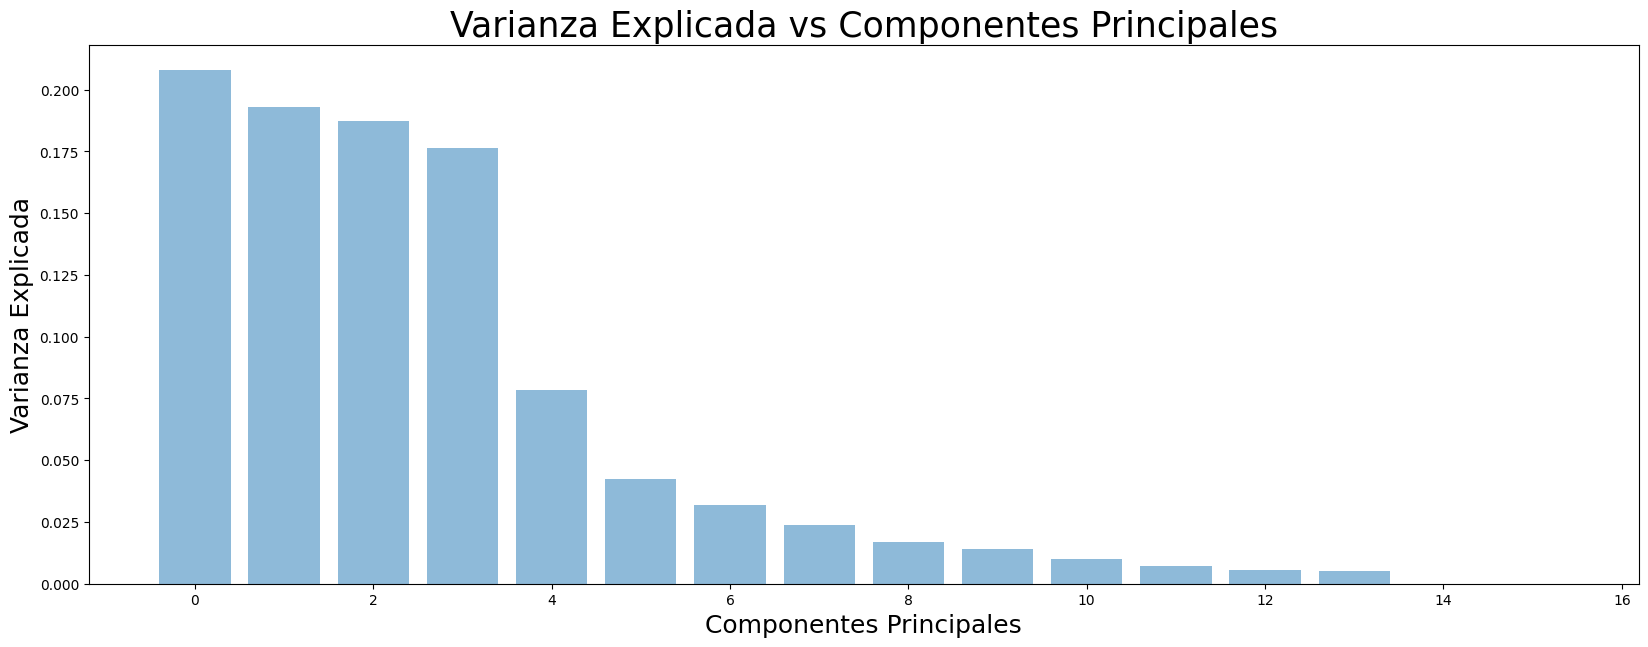

In [ ]:
# Graficamos un diagrama de barras mostrando la varianza explicada por cada componente principal
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(16), explained_variance, alpha=0.5, align='center')
plt.ylabel('Varianza Explicada',  fontsize = 18)
plt.xlabel('Componentes Principales', fontsize = 18)
plt.title('Varianza Explicada vs Componentes Principales', fontsize = 25)
plt.show()

El 100% de la varianza total de los datos puede representarse con 16 componentes, aunque a partir del componente 14 son cero, por lo que solo los primeros 13 componentes aportan varianza explicada.

In [ ]:
#Inicializamos el Análisis de Componentes Principales (PCA) con 16 componentes
pca = PCA(n_components=10)
#Ajustamos pca a los datos
X_pca = pca.fit_transform(X)
# Guardamos la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20780175 0.19288287 0.18730439 0.17630645 0.0786175  0.0425141
 0.03194988 0.0239221  0.01701177 0.01398111]


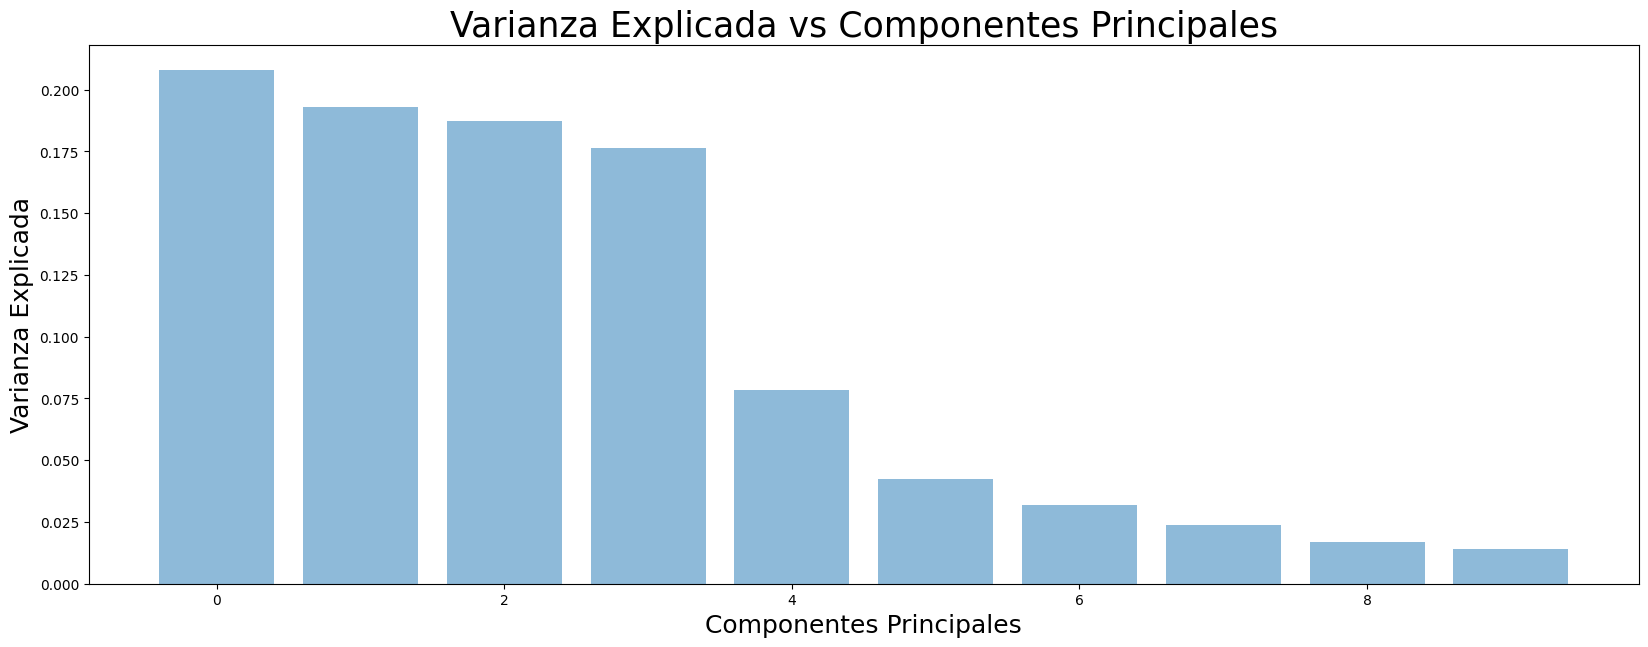

In [ ]:
# Graficamos un diagrama de barras mostrando la varianza explicada por cada componente principal
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center')
plt.ylabel('Varianza Explicada',  fontsize = 18)
plt.xlabel('Componentes Principales', fontsize = 18)
plt.title('Varianza Explicada vs Componentes Principales', fontsize = 25)
plt.show()

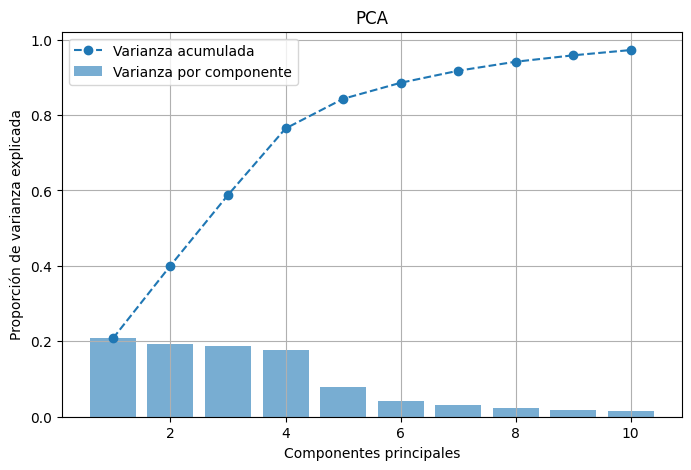

In [ ]:
var_exp = pca.explained_variance_ratio_
sum_var_exp = pca.explained_variance_ratio_.cumsum()

# Graficamos la varianza acumulada como línea con marcadores y barras
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), sum_var_exp, marker='o', linestyle='--', label="Varianza acumulada")
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label="Varianza por componente")

plt.xlabel("Componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(sum_var_exp[-1])

0.9722919136031302


In [ ]:
#Inicializamos un PCA que pueda explicar el 90% de la varianza
pca = PCA(0.90)
X_pca = pca.fit_transform(X)

In [ ]:
var_exp = pca.explained_variance_ratio_
sum_var_exp = pca.explained_variance_ratio_.cumsum()

In [ ]:
print(sum_var_exp[-1])

0.9173769339404765


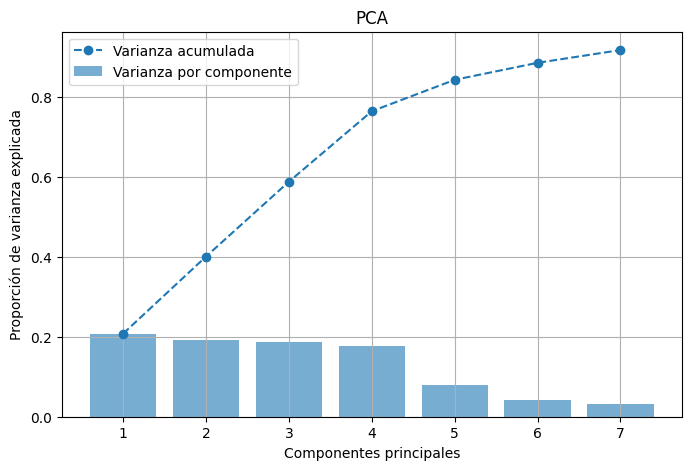

In [ ]:
# Graficamos la varianza acumulada como línea con marcadores y barras
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), sum_var_exp, marker='o', linestyle='--', label="Varianza acumulada")
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label="Varianza por componente")

plt.xlabel("Componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()

El PCA anterior nos muestra que el 91% de la varianza de los datos de nuestro dataset con 7 componentes.